## Load Data from CSVs

In [3]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()
def parse_csv(file):
    with open(file, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        reader_dict = list(reader)
        return reader_dict

In [4]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

enrollments = parse_csv('enrollments.csv')
daily_engagement =  parse_csv('daily_engagement.csv')
project_submissions =  parse_csv('project_submissions.csv')

# Print first row of each table
print enrollments[0]
print daily_engagement[0]
print project_submissions[0]

{u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2014-11-10', u'account_key': u'448', u'cancel_date': u'2015-01-14', u'days_to_cancel': u'65'}
{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


## Fixing Data Types

In [5]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [6]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [7]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

## Investigating the Data

In [8]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

def unique_students(data):
    num = set()
    for d in data:
        if 'account_key' not in d.keys():
            num.add(d['acct'])
        else:
            num.add(d['account_key'])
    return num


enrollment_num_rows = len(enrollments)           
enrollment_num_unique_students = len(unique_students(enrollments))

engagement_num_rows = len(daily_engagement)         
engagement_num_unique_students = len(unique_students(daily_engagement))

submission_num_rows = len(project_submissions)        
submission_num_unique_students = len(unique_students(project_submissions))

## Problems in the Data

In [9]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
for engagment in daily_engagement:
    engagment['account_key'] = engagment.pop('acct')
print daily_engagement[0]['account_key']

0


## Missing Engagement Records

In [10]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
missing_engagments = []
student_engagments = unique_students(daily_engagement)

for enrollment in enrollments:
    if enrollment['account_key'] not in student_engagments:
        missing_engagments.append(enrollment)
print missing_engagments[0]
print missing_engagments[1]



{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 13, 0, 0), u'account_key': u'871', u'cancel_date': datetime.datetime(2014, 11, 13, 0, 0), u'days_to_cancel': 0}


## Checking for More Problem Records

In [11]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
error_engagments = []

for enrollment in enrollments:
    if enrollment['account_key'] not in student_engagments and enrollment['days_to_cancel'] !=0:
        error_engagments.append(enrollment)
print len(error_engagments)


3


## Tracking Down the Remaining Problems

In [12]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [13]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [14]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [15]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}
for enrollment in non_udacity_enrollments:
    if enrollment['days_to_cancel'] == None or enrollment['days_to_cancel'] > 7:
        paid_students[enrollment['account_key']] = enrollment['join_date']
print len(paid_students)

995


## Getting Data from First Week

In [16]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >=0

In [17]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

def paid_students_only(data):
    paid = []
    for data_point in data:
        if data_point['account_key'] in paid_students.keys():
            paid.append(data_point)
    return paid

paid_udacity_enrollments = paid_students_only(non_udacity_enrollments)
paid_udacity_engagement = paid_students_only(non_udacity_engagement)
paid_udacity_submissions = paid_students_only(non_udacity_submissions)

paid_engagement_in_first_week = []

for engagment in paid_udacity_engagement:
    account = engagment["account_key"]
    join_date = paid_students[account]
    engagment_date = engagment['utc_date']
    if  within_one_week(join_date,engagment_date):
        paid_engagement_in_first_week.append(engagment)

print len(paid_engagement_in_first_week)

6920


## Exploring Student Engagement

In [18]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [19]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [20]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 305.414718908
Standard deviation: 405.91261032
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [21]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.
for account in total_minutes_by_account.keys():
    if total_minutes_by_account[account] == np.max(total_minutes):
        for engagment in engagement_by_account[account]:
            print engagment
            

{u'lessons_completed': 4, u'num_courses_visited': 4, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 13, 0, 0)}
{u'lessons_completed': 1, u'num_cour

## Lessons Completed in First Week

In [60]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

def total_by_account(engagment_array,type_variable):
    total_by_account = {}
    for account_key, engagement_for_student in engagment_array.items():
        total = 0
        for engagement_record in engagement_for_student:
            if type_variable == 'num_courses_visited' and engagement_record['num_courses_visited'] > 0:
                total +=1
            else:
                total += engagement_record[type_variable]
        total_by_account[account_key] = total
    total_type = total_by_account.values()
    print 'Mean:', np.mean(total_type)
    print 'Standard deviation:', np.std(total_type)
    print 'Minimum:', np.min(total_type)
    print 'Maximum:', np.max(total_type)
    return total_type

total = total_by_account(engagement_by_account,'lessons_completed')

Mean: 1.62888665998
Standard deviation: 2.99927909496
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [61]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

total = total_by_account(engagement_by_account,'num_courses_visited')

Mean: 2.90672016048
Standard deviation: 2.22196678285
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [38]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

passing_submission = set()

for submission in paid_udacity_submissions:
    if submission['lesson_key'] in subway_project_lesson_keys:
        account = submission['account_key']
        if submission['assigned_rating'] in ['PASSED', 'DISTINCTION']:
            passing_submission.add(account)

passing_engagement = []
non_passing_engagement = []

for engagment in paid_engagement_in_first_week:
    if engagment['account_key'] in passing_submission:
        passing_engagement.append(engagment)
    else:
        non_passing_engagement.append(engagment)
        
print len(passing_engagement)
print len(non_passing_engagement)

4528
2392


## Comparing the Two Student Groups

In [63]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

def engagment_by_account(engagment_list):
    engagement_by_account = defaultdict(list)
    for engagement_record in engagment_list:
        account_key = engagement_record['account_key']
        engagement_by_account[account_key].append(engagement_record)
    return engagement_by_account

passing_engagment_by_account = engagment_by_account(passing_engagement)
non_passing_engagement_by_account = engagment_by_account(non_passing_engagement)

# Minutes visited
print "Minutes Visited Passing"
total_min_passing = total_by_account(passing_engagment_by_account,'total_minutes_visited')
print "\nMinutes Visited Non-Passing"
total_min_non = total_by_account(non_passing_engagement_by_account,'total_minutes_visited')

# Lessons Completed visited
print "\nLessons Completed Passing"
total_lessons_passing = total_by_account(passing_engagment_by_account,'lessons_completed')
print "\nLessons Completed Non-Passing"
total_lessons_non = total_by_account(non_passing_engagement_by_account,'lessons_completed')

# Total Visited visited
print "\nTotal Visited Passing"
total_visited_passing = total_by_account(passing_engagment_by_account,'num_courses_visited')
print "\nTotal Visited Non-Passing"
total_visited_non = total_by_account(non_passing_engagement_by_account,'num_courses_visited')

Minutes Visited Passing
Mean: 391.481722325
Standard deviation: 439.653061726
Minimum: 0.0
Maximum: 3564.7332645

Minutes Visited Non-Passing
Mean: 145.399341866
Standard deviation: 268.97150373
Minimum: 0.0
Maximum: 1768.52274933

Lessons Completed Passing
Mean: 2.04327666151
Standard deviation: 3.1428602763
Minimum: 0
Maximum: 36

Lessons Completed Non-Passing
Mean: 0.867816091954
Standard deviation: 2.54833703959
Minimum: 0
Maximum: 27

Total Visited Passing
Mean: 3.42967542504
Standard deviation: 2.21298340866
Minimum: 0
Maximum: 7

Total Visited Non-Passing
Mean: 1.95114942529
Standard deviation: 1.88929952676
Minimum: 0
Maximum: 7


## Making Histograms

Populating the interactive namespace from numpy and matplotlib


(array([ 270.,   36.,   17.,    9.,    6.,    2.,    1.,    5.,    0.,    2.]),
 array([    0.        ,   176.85227493,   353.70454987,   530.5568248 ,
          707.40909973,   884.26137467,  1061.1136496 ,  1237.96592453,
         1414.81819947,  1591.6704744 ,  1768.52274933]),
 <a list of 10 Patch objects>)

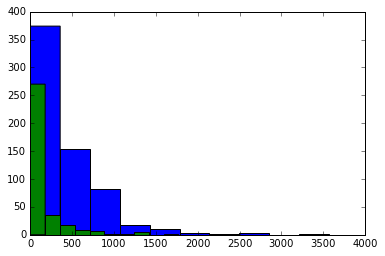

In [68]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.
%pylab inline
import matplotlib.pyplot as plt
plt.hist(total_min_passing)
plt.hist(total_min_non)

(array([ 317.,   17.,    6.,    4.,    1.,    1.,    0.,    1.,    0.,    1.]),
 array([  0. ,   2.7,   5.4,   8.1,  10.8,  13.5,  16.2,  18.9,  21.6,
         24.3,  27. ]),
 <a list of 10 Patch objects>)

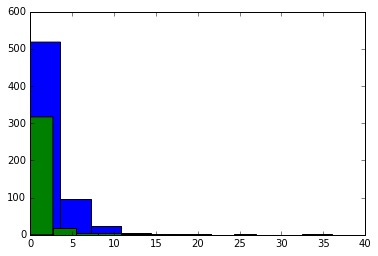

In [69]:
plt.hist(total_lessons_passing)
plt.hist(total_lessons_non)

(array([ 89.,  93.,  59.,   0.,  42.,  16.,   0.,  24.,  17.,   8.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

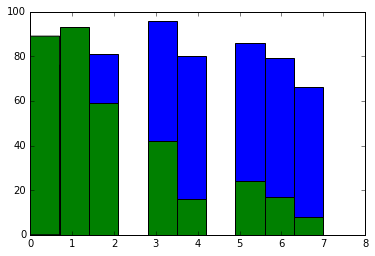

In [70]:
plt.hist(total_visited_passing)
plt.hist(total_visited_non)

## Improving Plots and Sharing Findings

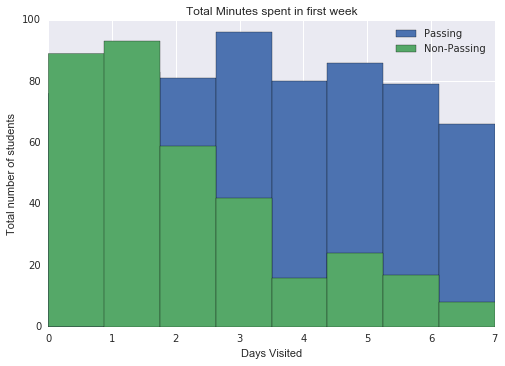

In [75]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

import seaborn as sns
plt.hist(total_visited_passing, label="Passing", bins=8)
plt.hist(total_visited_non, label="Non-Passing", bins=8)
plt.xlabel("Days Visited")
plt.ylabel("Total number of students")
plt.title("Total Minutes spent in first week")
plt.legend()